In [70]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

In [71]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv('data/train.csv')
df.head(3)

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived


In [73]:
df.dtypes

id                         int64
surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
outcome                   object
dtype: object

In [74]:
# remove nan values
# df_bs = df.dropna()

In [75]:
# convert each object column to a category
category_mapping = {}
categorised_df = df.copy(deep=False)
for col in categorised_df.select_dtypes(include='object').columns:
    categorised_df[col] = categorised_df[col].astype('category')
    category_mapping[col] = {value: i for i, value in enumerate(categorised_df[col].unique())}
    categorised_df[col] = categorised_df[col].map(category_mapping[col])
print(category_mapping)
categorised_df.head(2)


{'surgery': {'yes': 0, 'no': 1}, 'age': {'adult': 0, 'young': 1}, 'temp_of_extremities': {'cool': 0, 'cold': 1, 'normal': 2, 'warm': 3, nan: 4}, 'peripheral_pulse': {'reduced': 0, 'normal': 1, nan: 2, 'absent': 3, 'increased': 4}, 'mucous_membrane': {'dark_cyanotic': 0, 'pale_cyanotic': 1, 'pale_pink': 2, 'normal_pink': 3, 'bright_pink': 4, 'bright_red': 5, nan: 6}, 'capillary_refill_time': {'more_3_sec': 0, 'less_3_sec': 1, nan: 2, '3': 3}, 'pain': {'depressed': 0, 'mild_pain': 1, 'extreme_pain': 2, 'alert': 3, 'severe_pain': 4, nan: 5, 'slight': 6}, 'peristalsis': {'absent': 0, 'hypomotile': 1, 'normal': 2, 'hypermotile': 3, nan: 4, 'distend_small': 5}, 'abdominal_distention': {'slight': 0, 'moderate': 1, 'none': 2, 'severe': 3, nan: 4}, 'nasogastric_tube': {'slight': 0, 'none': 1, 'significant': 2, nan: 3}, 'nasogastric_reflux': {'less_1_liter': 0, 'more_1_liter': 1, 'none': 2, nan: 3, 'slight': 4}, 'rectal_exam_feces': {'decreased': 0, 'absent': 1, nan: 2, 'normal': 3, 'increased':

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,0,0,530001,38.1,132.0,24.0,0,0,0,...,57.0,8.5,0,3.4,0,2209,0,0,0,0
1,1,0,0,533836,37.5,88.0,12.0,0,1,1,...,33.0,64.0,0,2.0,0,2208,0,0,0,1


In [76]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(categorised_df.drop(columns=['outcome'])), columns=categorised_df.drop(columns=['outcome']).columns)
y = categorised_df['outcome']
display(X.head(2))
display(y.head(2))


,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,-1.730649,-0.626365,-0.254274,-0.313086,-0.129621,1.801773,-0.368142,-0.776885,-0.728405,-1.568323,...,-0.894029,0.702421,-0.483319,-0.925201,0.068659,-0.573922,-0.298737,-0.075465,-0.040275,-1.085417
1,-1.727844,-0.626365,-0.254274,-0.310258,-0.890705,0.289582,-1.097830,-0.776885,0.724874,-0.949709,...,-0.894029,-1.576449,1.598010,-0.925201,-0.812647,-0.573922,-0.298921,-0.075465,-0.040275,-1.085417


0    0
1    1
Name: outcome, dtype: category
Categories (3, int64): [0, 1, 2]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(988, 28) (988,) (247, 28) (247,)


In [78]:
clf = RandomForestClassifier(n_estimators=200, max_depth=50, random_state=0)
clf.fit(X_train, y_train)
print(f"Train accuracy: {clf.score(X_train, y_train)}")
print(f"Test accuracy: {clf.score(X_test, y_test)}")

Train accuracy: 1.0
Test accuracy: 0.708502024291498


In [79]:
model = RandomForestClassifier()
hp = {'max_depth': [10, 50, 100, 200, 500, 1000, 2000], 'n_estimators': [10, 50, 100, 200, 400, 600, 1000]}
hp = {
    'n_estimators': [10, 50, 100, 200], 
    'max_depth': [None, 5, 10, 20], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4], 
    'bootstrap': [True, False],
    # 'max_features': ['auto', 'sqrt']
}
random_rf = RandomizedSearchCV(estimator=model, param_distributions=hp,
                              n_iter=100, scoring='accuracy', cv=5,
                              refit=True, n_jobs=-1, verbose=1)
random_rf.fit(X_train, y_train)
print(f"Final Test accuracy: {random_rf.score(X_test, y_test)}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Final Test accuracy: 0.7246963562753036


In [80]:
# create predictions for the test set
test_df = pd.read_csv('data/test.csv')
for col in test_df.select_dtypes(include='object').columns:
    test_df[col] = test_df[col].map(category_mapping[col])
scaled_test = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)
print("nan values in test set:", scaled_test.isna().sum().sum())
# print the nan values
scaled_test[scaled_test.isna().any(axis=1)]
# replace nan value with the mean of the column
scaled_test['pain'].fillna(scaled_test['pain'].mean(), inplace=True)
display(scaled_test.head(2))

predictions = random_rf.predict(scaled_test)
ids = test_df['id']
reverse_mapping = {v: k for k, v in category_mapping['outcome'].items()}
submission_df = pd.DataFrame({'id': ids, 'outcome': [reverse_mapping[prediction] for prediction in predictions]})
submission_df.head(10)


nan values in test set: 1


,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1.733454,1.596512,-0.254274,-0.310098,0.504617,-1.360082,-0.611371,1.003176,0.724874,0.287517,...,-0.894029,-0.721873,-0.520820,1.317435,-0.623795,1.742397,-0.705212,-0.075465,-0.040275,-1.085417
1,1.736259,-0.626365,-0.254274,-0.314216,-0.002773,1.114413,1.091232,-0.776885,-0.728405,0.906131,...,-0.894029,-0.531967,-0.577073,-0.925201,-0.434944,1.742397,-0.298921,-0.075465,-0.040275,0.921305


,id,outcome
0,1235,lived
1,1236,died
2,1237,lived
3,1238,euthanized
4,1239,lived
5,1240,died
6,1241,died
7,1242,died
8,1243,lived
9,1244,lived


In [81]:
submission_df.to_csv('data/submission_doug.csv', index=False)

## Trying with XGBoost

In [82]:
!pip install xgboost

In [83]:
from xgboost import XGBRegressor, XGBClassifier
# Define the model
# model = XGBRegressor(n_estimators=1000, learning_rate=2e-2, early_stopping_rounds=5, random_state=0)
model = XGBClassifier(n_estimators=1000, learning_rate=2e-2, early_stopping_rounds=5, random_state=0)

# Fit the model
model.fit(X_train, y_train, 
             eval_set=[(X_test, y_test)], verbose=1)

[0]	validation_0-mlogloss:1.08876
[1]	validation_0-mlogloss:1.07936
[2]	validation_0-mlogloss:1.06997
[3]	validation_0-mlogloss:1.06112
[4]	validation_0-mlogloss:1.05245
[5]	validation_0-mlogloss:1.04404
[6]	validation_0-mlogloss:1.03619
[7]	validation_0-mlogloss:1.02841
[8]	validation_0-mlogloss:1.02076
[9]	validation_0-mlogloss:1.01349
[10]	validation_0-mlogloss:1.00663
[11]	validation_0-mlogloss:1.00021
[12]	validation_0-mlogloss:0.99371
[13]	validation_0-mlogloss:0.98756
[14]	validation_0-mlogloss:0.98160
[15]	validation_0-mlogloss:0.97565
[16]	validation_0-mlogloss:0.97013
[17]	validation_0-mlogloss:0.96470
[18]	validation_0-mlogloss:0.95926
[19]	validation_0-mlogloss:0.95374
[20]	validation_0-mlogloss:0.94871
[21]	validation_0-mlogloss:0.94382
[22]	validation_0-mlogloss:0.93907
[23]	validation_0-mlogloss:0.93444
[24]	validation_0-mlogloss:0.92998
[25]	validation_0-mlogloss:0.92550
[26]	validation_0-mlogloss:0.92127
[27]	validation_0-mlogloss:0.91673
[28]	validation_0-mlogloss:0.9

/Users/douglas/miniconda3/envs/kaggle/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/douglas/miniconda3/envs/kaggle/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/douglas/miniconda3/envs/kaggle/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/douglas/miniconda3/envs/kaggle/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, C

[54]	validation_0-mlogloss:0.83324
[55]	validation_0-mlogloss:0.83028
[56]	validation_0-mlogloss:0.82772
[57]	validation_0-mlogloss:0.82483
[58]	validation_0-mlogloss:0.82209
[59]	validation_0-mlogloss:0.81980
[60]	validation_0-mlogloss:0.81719
[61]	validation_0-mlogloss:0.81457
[62]	validation_0-mlogloss:0.81247
[63]	validation_0-mlogloss:0.81051
[64]	validation_0-mlogloss:0.80826
[65]	validation_0-mlogloss:0.80688
[66]	validation_0-mlogloss:0.80537
[67]	validation_0-mlogloss:0.80376
[68]	validation_0-mlogloss:0.80180
[69]	validation_0-mlogloss:0.80015
[70]	validation_0-mlogloss:0.79850
[71]	validation_0-mlogloss:0.79718
[72]	validation_0-mlogloss:0.79589
[73]	validation_0-mlogloss:0.79459
[74]	validation_0-mlogloss:0.79332
[75]	validation_0-mlogloss:0.79205
[76]	validation_0-mlogloss:0.79116
[77]	validation_0-mlogloss:0.78987
[78]	validation_0-mlogloss:0.78857
[79]	validation_0-mlogloss:0.78705
[80]	validation_0-mlogloss:0.78553
[81]	validation_0-mlogloss:0.78392
[82]	validation_0-ml

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=5,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [84]:
predictions = model.predict(scaled_test)
ids = test_df['id']
reverse_mapping = {v: k for k, v in category_mapping['outcome'].items()}
submission_df = pd.DataFrame({'id': ids, 'outcome': [reverse_mapping[prediction] for prediction in predictions]})
display(submission_df.head(10))
submission_df.to_csv('data/submission_xgb_classifier.csv', index=False)

/Users/douglas/miniconda3/envs/kaggle/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/douglas/miniconda3/envs/kaggle/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/douglas/miniconda3/envs/kaggle/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/douglas/miniconda3/envs/kaggle/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, C

,id,outcome
0,1235,lived
1,1236,died
2,1237,lived
3,1238,euthanized
4,1239,lived
5,1240,died
6,1241,died
7,1242,died
8,1243,lived
9,1244,lived


In [85]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBClassifier

In [100]:
df = pd.read_csv('data/train.csv', index_col='id')
X = pd.read_csv('data/train.csv', index_col='id')
y = X['outcome']
y = y.astype('category')
X.drop(columns=['outcome'], inplace=True)
X_test = pd.read_csv('data/test.csv', index_col='id')

### Category values check
Before encoding the categories with numbers, we check if some values are in the test data and not in the test data

In [101]:
categories_cols = X.select_dtypes(include='object').columns.tolist()

train_col_to_values = X[categories_cols].apply(lambda x: x.unique())
test_col_to_values = X_test[categories_cols].apply(lambda x: x.unique())

problematic_cols = []
for col in categories_cols:
    if not set(test_col_to_values[col]).issubset(set(train_col_to_values[col])):
        problematic_cols.append(col)
        print(set(train_col_to_values[col]))
        print("different values:", set(test_col_to_values[col]) - set(train_col_to_values[col]))
print("problematic_cols:", problematic_cols)


{nan, 'depressed', 'slight', 'mild_pain', 'extreme_pain', 'alert', 'severe_pain'}
different values: {'moderate'}
problematic_cols: ['pain']


In [103]:
# print(X_test[X_test['pain'] == 'moderate'].id.count())
# we see only one value that is problematic, so we replace it with the closest value
X_test['pain'] = X_test['pain'].replace('moderate', 'slight')
assert X_test[X_test['pain'] == 'moderate'].size == 0


### Feature Selection
In this part we do some analysis over the columns influence on the outcome to see if we will drop some of them

In [104]:
# we can start with some simple Mutual Information measures
def make_mi_scores(X, y, discrete_features):
    #mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

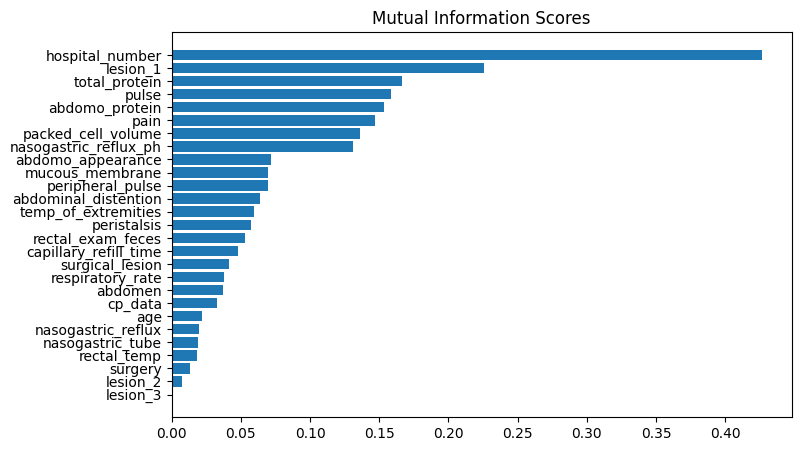

In [105]:
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
discrete_features = X.dtypes == int
mi_scores = make_mi_scores(X, y, discrete_features)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

We can see that some of the features don't seem to bring any information to the outcome. So we will start by training a model only with
the features having an MI score > 0.10

In [106]:
selected_features = mi_scores[mi_scores > 0.1].index.tolist()
selected_features

['hospital_number',
 'lesion_1',
 'total_protein',
 'pulse',
 'abdomo_protein',
 'pain',
 'packed_cell_volume',
 'nasogastric_reflux_ph']

/Users/douglas/miniconda3/envs/kaggle/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/douglas/miniconda3/envs/kaggle/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/douglas/miniconda3/envs/kaggle/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/douglas/miniconda3/envs/kaggle/lib/python3.11/site-packages/sea

TypeError: Neither the `x` nor `y` variable appears to be numeric.

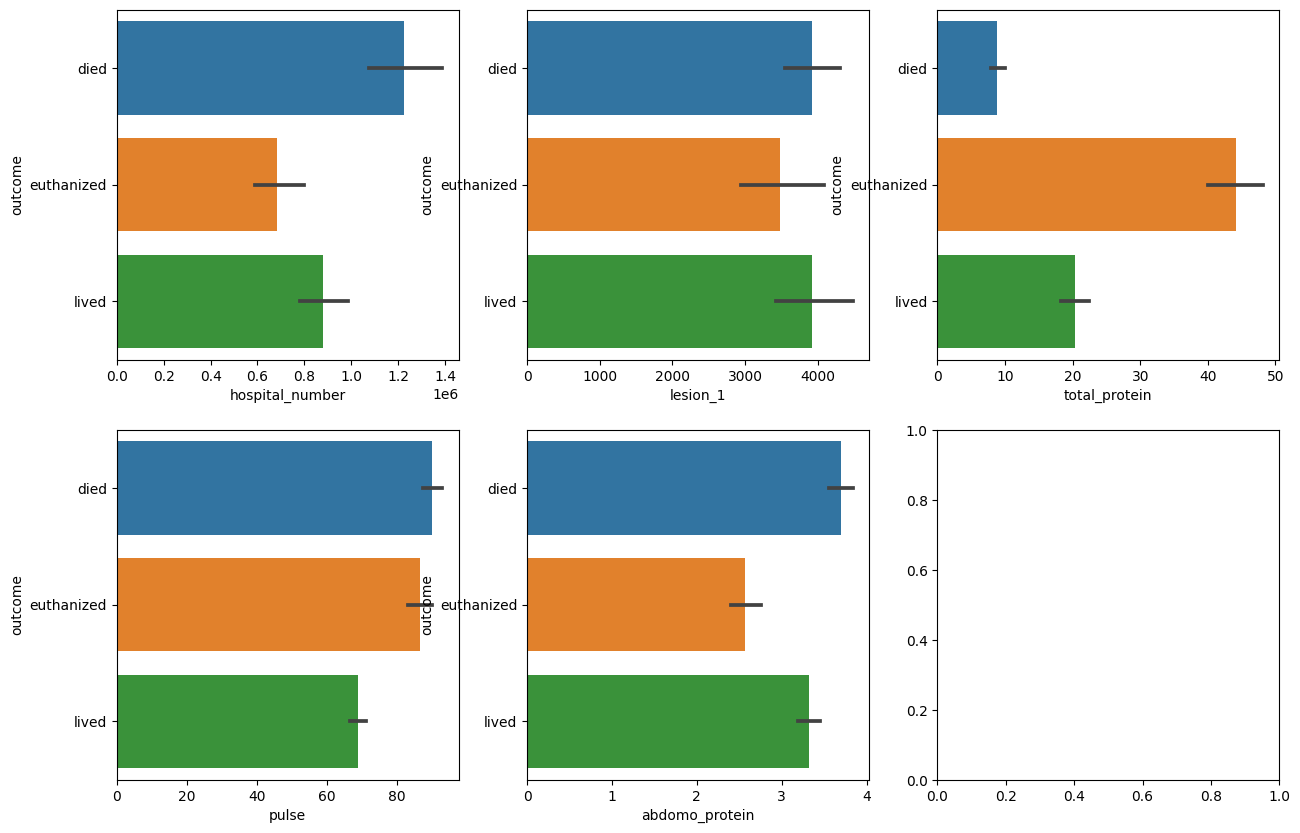

In [107]:
fig, axs = plt.subplots(ncols=3,nrows=2, figsize=(15, 10))
for i, col in enumerate(selected_features[:6]):
    sns.barplot(x=df[col], y=y, ax=axs[i//3][i%3])

By looking at this, we could also decide to keep only hospital_number and total_protein

In [149]:
df.dtypes

surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
outcome                   object
dtype: object

In [152]:
X_filtered_0 = X[selected_features]
X_test_filtered_0 = X_test[selected_features]
X_filtered_1 = X[['hospital_number', 'total_protein']]
X_test_filtered_1 = X_test[['hospital_number', 'total_protein']]
# categorical
categorical_features = df.select_dtypes(include='object').columns.tolist()
categorical_features.remove('outcome')
X_filtered_2 = X[selected_features + categorical_features]
X_test_filtered_2 = X_test[selected_features+ categorical_features]

In [159]:
# remove duplicated columns
X_filtered_2 = X_filtered_2.loc[:,~X_filtered_2.columns.duplicated()]
X_test_filtered_2 = X_test_filtered_2.loc[:,~X_test_filtered_2.columns.duplicated()]

### Missing value handling

We deplace the missing value depending on the column.

In [110]:
# compute for each column the number of nan values
#print(X.isna().sum())
num_cols = X.select_dtypes(include='number').columns.tolist()
cat_cols = X.select_dtypes(include='object').columns.tolist()
# cat_cols.remove('outcome')
nan_num = X[num_cols].isna().sum()
nan_col = X[cat_cols].isna().sum()
print("missing numerical values:", nan_num[nan_num > 0])
print("missing categorical values:", nan_col[nan_col > 0])
# as we don't have too much missing values (less 20% of column value, we can replace them with the most frequent value)
# TODO commented as no missing value
# cat_inputer = SimpleImputer(strategy='most_frequent')
# imputed_X = pd.DataFrame(cat_inputer.fit_transform(X))
# imputed_X_test = pd.DataFrame(cat_inputer.transform(X_test))
# 
# imputed_X.columns = X.columns
# imputed_X_test.columns = X_test.columns
# 
# # assert we don't have any nan values
# assert imputed_X.isna().sum().sum() == 0
# 
# # cinvert dtypes to original ones
# imputed_X[cat_cols] = imputed_X[cat_cols].astype('category')
# imputed_X_test[cat_cols] = imputed_X_test[cat_cols].astype('category')
# imputed_X[num_cols] = imputed_X[num_cols].astype('float64')
# imputed_X_test[num_cols] = imputed_X_test[num_cols].astype('float64')

missing numerical values: Series([], dtype: int64)
missing categorical values: Series([], dtype: float64)


### Encoding categories

In [160]:
category_enc = OrdinalEncoder()

#encoded_X = imputed_X.copy(deep=False)
#encoded_X = X_filtered_0.copy(deep=False)
encoded_X = X_filtered_2.copy(deep=False)
#encoded_X = X_filtered_1.copy(deep=False)
#encoded_X_test = imputed_X_test.copy(deep=False)
#encoded_X_test = X_test_filtered_0.copy(deep=False)
#encoded_X_test = X_test_filtered_1.copy(deep=False)
encoded_X_test = X_test_filtered_2.copy(deep=False)

# Apply ordinal encoder 
encoded_X[cat_cols] = category_enc.fit_transform(encoded_X[cat_cols])
encoded_X_test[cat_cols] = category_enc.transform(encoded_X_test[cat_cols])

# encode the target variable
outcome_enc = OrdinalEncoder()
encoded_y = outcome_enc.fit_transform(y.values.reshape(-1, 1)).flatten()
encoded_y = encoded_y.astype(int)
print("encoded_y:", encoded_y[:5])

encoded_y: [0 1 2 2 2]


### Building the Ml model

We will use an XGBClassifier in order to predict the weatlness of the horses

In [161]:
# model = XGBClassifier(n_estimators=1000, learning_rate=2e-2, early_stopping_rounds=5, random_state=0)
# model = XGBClassifier(n_estimators=1000, learning_rate=2e-2, early_stopping_rounds=100, random_state=0)
params = {'n_estimators': 400,
            'learning_rate': 0.05,
            'max_depth': 4,
            'subsample': 0.8,
            'colsample_bytree': 0.1,
            'n_jobs': -1,
            'eval_metric': 'mlogloss',
            'objective': 'multi:softprob',
            'tree_method': 'hist',
            'random_state': 42,
        }
params = {
            'n_estimators': 200,
            'learning_rate': 0.05,
            'max_depth': 4,
            'subsample': 0.8,
            'colsample_bytree': 0.1,
            'n_jobs': -1,
            'eval_metric': 'mlogloss',
            'objective': 'multi:softprob',
            'tree_method': 'hist',
            'verbosity': 0,
            'random_state': 42,
        }
#model = XGBClassifier(n_estimators=1000, learning_rate=1e-2, early_stopping_rounds=5, random_state=0)
model = XGBClassifier(**params)
X_train = encoded_X.copy(deep=False) 
X_train, X_valid = train_test_split(X_train, test_size=0.2, random_state=42)
y_train, y_valid = encoded_y[X_train.index], encoded_y[X_valid.index]
model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=0)
model.score(X_valid, y_valid)
# 0.728744939271255

/Users/douglas/miniconda3/envs/kaggle/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/douglas/miniconda3/envs/kaggle/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/douglas/miniconda3/envs/kaggle/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/douglas/miniconda3/envs/kaggle/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, C

0.7489878542510121

In [130]:
# convert object to category
for col in X_test.select_dtypes(include='object').columns:
    X_test[col] = X_test[col].astype('category')

In [136]:
for col in encoded_X_test.select_dtypes(include='object').columns:
    encoded_X_test[col] = encoded_X_test[col].astype('category')

In [138]:
predictions = model.predict(encoded_X_test)
submission_df = pd.DataFrame({'id': ids, 'outcome': [reverse_mapping[prediction] for prediction in predictions]})
display(submission_df.head(10))
submission_df.to_csv('data/submission_xgb_classifier_MI.csv', index=False)

/Users/douglas/miniconda3/envs/kaggle/lib/python3.11/site-packages/xgboost/data.py:463: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  or is_sparse(dtype)
/Users/douglas/miniconda3/envs/kaggle/lib/python3.11/site-packages/xgboost/data.py:464: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  or (is_categorical_dtype(dtype) and enable_categorical)
/Users/douglas/miniconda3/envs/kaggle/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/douglas/miniconda3/envs/kaggle/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_

,id,outcome
0,1235,lived
1,1236,lived
2,1237,lived
3,1238,euthanized
4,1239,lived
5,1240,died
6,1241,lived
7,1242,died
8,1243,lived
9,1244,lived
